In [2]:
import re

import numpy as np
import pandas as pd

import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('../../../input/2016 School Explorer.csv')
df2 = pd.read_csv('../../../input/D5 SHSAT Registrations and Testers.csv')

In [4]:
df1_copy = df1.copy()
df2_copy = df2.copy()

In [5]:
for col in df1_copy.columns.values:
    print col

Adjusted Grade
New?
Other Location Code in LCGMS
School Name
SED Code
Location Code
District
Latitude
Longitude
Address (Full)
City
Zip
Grades
Grade Low
Grade High
Community School?
Economic Need Index
School Income Estimate
Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Student Attendance Rate
Percent of Students Chronically Absent
Rigorous Instruction %
Rigorous Instruction Rating
Collaborative Teachers %
Collaborative Teachers Rating
Supportive Environment %
Supportive Environment Rating
Effective School Leadership %
Effective School Leadership Rating
Strong Family-Community Ties %
Strong Family-Community Ties Rating
Trust %
Trust Rating
Student Achievement Rating
Average ELA Proficiency
Average Math Proficiency
Grade 3 ELA - All Students Tested
Grade 3 ELA 4s - All Students
Grade 3 ELA 4s - American Indian or Alaska Native
Grade 3 ELA 4s - Black or African American
Grade 3 ELA 4s - Hispanic or Latino
Grade 3 ELA 4s - Asian or Pacific

In [6]:
for col in df2_copy.columns.values:
    print col

DBN
School name
Year of SHST
Grade level
Enrollment on 10/31
Number of students who registered for the SHSAT
Number of students who took the SHSAT


In [7]:
remove = ['Other Location Code in LCGMS', 'Adjusted Grade', 'New?']
df1_copy = df1_copy.drop(columns=remove)

In [8]:
df1_copy['IsCommunitySchool'] = df1_copy['Community School?'] == 'Yes'
df1_copy = df1_copy.drop(columns=['Community School?'])

In [9]:
percent_pattern = r'Percent\s.*'
percent_regex = re.compile(percent_pattern, re.IGNORECASE)

for col in df1_copy.columns.values:
    if percent_regex.search(col):
        print col
        df1_copy[col] = df1_copy[col].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Student Attendance Rate'] = df1_copy['Student Attendance Rate'].astype(np.object).str.replace('%', '').astype(float)
df1_copy['Percent of Students Chronically Absent'] = df1_copy['Percent of Students Chronically Absent'].astype(np.object).str.replace('%', '').astype(float)

Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Percent of Students Chronically Absent


In [10]:
df1_copy['School Name'] = df1_copy['School Name'].astype(str)
df1_copy = df1_copy[df1_copy['Grade High'] != '0K']
df1_copy['Grade High'] = df1_copy['Grade High'].astype(float)

<b> Remove the schools where highest grade taught is more than 5. This is because, SH-SAT is only for students studying in grade 8&9 

In [11]:
df1_copy = df1_copy[df1_copy['Grade High'] > 5]

<b> To derive a garding mechanism for school, we take all the paramters which specify the quality of schools.
We look at the correlation of the 6 factors based on which schools are rated. Weights for each of the factor was decided based on definitions and correlations.

In [12]:
school_rating = df1_copy[['Rigorous Instruction %',
'Collaborative Teachers %',
'Supportive Environment %',
'Effective School Leadership %',
'Strong Family-Community Ties %',
'Trust %']]

school_rating.head()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85%,78%,82%,73%,89%,88%
8,94%,91%,85%,87%,83%,93%
10,90%,81%,91%,67%,83%,85%
11,100%,100%,99%,99%,92%,99%
12,72%,77%,77%,72%,76%,87%


In [13]:
for col in school_rating.columns.values:
    school_rating[col] = school_rating[col].astype(np.object).str.replace('%', '').astype(float)
    
school_rating.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,85.0,78.0,82.0,73.0,89.0,88.0
8,94.0,91.0,85.0,87.0,83.0,93.0
10,90.0,81.0,91.0,67.0,83.0,85.0
11,100.0,100.0,99.0,99.0,92.0,99.0
12,72.0,77.0,77.0,72.0,76.0,87.0


In [14]:
school_rating.dropna(inplace=True)
school_rating.corr()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Rigorous Instruction %,1.000000,0.757568,0.720514,0.643093,0.540730,0.708931
Collaborative Teachers %,0.757568,1.000000,0.594114,0.915435,0.485351,0.882959
Supportive Environment %,0.720514,0.594114,1.000000,0.488354,0.581007,0.714141
Effective School Leadership %,0.643093,0.915435,0.488354,1.000000,0.444356,0.853213
Strong Family-Community Ties %,0.540730,0.485351,0.581007,0.444356,1.000000,0.588877
Trust %,0.708931,0.882959,0.714141,0.853213,0.588877,1.000000


<b> Weights to each factor </b>

<br>1.0 Supportive Environment % (Supportive Environment Rating)
<br>0.8 Rigorous Instruction % (Rigorous Instruction Rating)
<br>0.7 Effective School Leadership % (Effective School Leadership Rating)
<br>0.5 Strong Family-Community Ties % (Strong Family-Community Ties Rating)

<br>Collaborative Teachers % (Collaborative Teachers Rating)
<br>Trust % (Trust Rating)

In [15]:
school_rating['SPI'] = 0.7 * school_rating['Effective School Leadership %'] + 0.8 * school_rating['Rigorous Instruction %'] + school_rating['Supportive Environment %']+ 0.5 * school_rating['Strong Family-Community Ties %']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
school_rating['Location Code'] = df1_copy.loc[school_rating.index, 'Location Code']
school_rating['School Name'] = df1_copy.loc[school_rating.index, 'School Name']
school_rating['SED Code'] = df1_copy.loc[school_rating.index, 'SED Code']
school_rating['City'] = df1_copy.loc[school_rating.index, 'City']
school_rating['District'] = df1_copy.loc[school_rating.index, 'District']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [54]:
school_rating.columns.values

array(['Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %',
       'Strong Family-Community Ties %', 'Trust %', 'SPI',
       'Location Code', 'School Name', 'SED Code', 'City', 'District'],
      dtype=object)

In [55]:
school_rating[["School Name","Location Code","SED Code","District","City","SPI",'Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %']].to_excel('SPI_data.xlsx')
school_rating.tail()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,SPI,Location Code,School Name,SED Code,City,District
1265,78.0,76.0,78.0,71.0,78.0,83.0,229.1,84X703,BRONX PREPARATORY CHARTER SCHOOL,320900860807,BRONX,9
1266,84.0,88.0,84.0,85.0,87.0,91.0,254.2,84X704,KIPP ACADEMY CHARTER SCHOOL,320700860820,BRONX,7
1268,93.0,90.0,88.0,88.0,88.0,93.0,268.0,84X706,HARRIET TUBMAN CHARTER SCHOOL,320900860823,BRONX,9
1269,97.0,92.0,89.0,84.0,86.0,94.0,268.4,84X717,ICAHN CHARTER SCHOOL,320900860835,BRONX,9
1271,87.0,84.0,84.0,77.0,85.0,84.0,250.0,84X730,BRONX CHARTER SCHOOL FOR THE ARTS,320800860846,BRONX,8


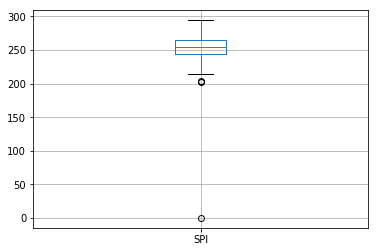

In [56]:
school_rating.boxplot(column='SPI')

In [57]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np

cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
school_rating.iplot(kind='box', filename='cufflinks/box-plots')

/usr/local/lib/python2.7/dist-packages/urllib3/util/ssl_.py:137: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings



Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

<b> Look at the lowest quartile of SPI. Analyse these schools

In [61]:
poor_schools = school_rating[school_rating['SPI'] < 243.55]
print "Number of poor schools: " + str(len(poor_schools))

poor_schools_sorted = poor_schools.sort_values('SPI')

poor_schools_sorted.head()

Number of poor schools: 155


,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %,SPI,Location Code,School Name,SED Code,City,District
1183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84M202,GREAT OAKS CHARTER SCHOOL,310100861055,NEW YORK,1
876,83.0,57.0,73.0,34.0,79.0,71.0,202.7,27Q045,P.S. 045 CLARENCE WITHERSPOON,342700010045,SOUTH OZONE PARK,27
233,67.0,64.0,78.0,53.0,71.0,69.0,204.2,08X123,J.H.S. 123 JAMES M. KIERAN,320800010123,BRONX,8
958,85.0,59.0,82.0,45.0,66.0,64.0,214.5,28Q680,QUEENS GATEWAY TO HEALTH SCIENCES SECONDARY SC...,342800011680,JAMAICA,28
293,73.0,80.0,78.0,60.0,75.0,79.0,215.9,09X313,I.S. 313 SCHOOL OF LEADERSHIP DEVELOPMENT,320900010313,BRONX,9


In [19]:
index_list = list(poor_schools.index)
print index_list
poor_schools_details_temp = df1_copy.loc[df1_copy.index.isin(index_list)]
poor_schools_details_temp.tail()
print poor_schools_details_temp.index

[12, 13, 19, 21, 63, 68, 71, 81, 100, 104, 123, 135, 147, 150, 151, 153, 165, 173, 178, 210, 213, 214, 218, 219, 233, 236, 242, 249, 251, 252, 253, 255, 259, 265, 273, 283, 284, 285, 286, 288, 293, 294, 296, 299, 300, 307, 315, 321, 327, 333, 334, 335, 339, 342, 344, 345, 360, 367, 398, 399, 423, 426, 429, 438, 440, 441, 442, 458, 470, 473, 480, 486, 527, 533, 535, 559, 564, 569, 578, 586, 593, 598, 608, 609, 630, 631, 637, 638, 644, 674, 676, 713, 718, 721, 757, 761, 762, 773, 774, 782, 786, 787, 789, 793, 816, 833, 839, 842, 853, 862, 875, 876, 891, 900, 904, 906, 912, 915, 922, 928, 946, 952, 954, 958, 959, 970, 979, 986, 988, 994, 1012, 1022, 1034, 1052, 1069, 1071, 1080, 1119, 1122, 1123, 1142, 1149, 1154, 1162, 1171, 1183, 1184, 1214, 1219, 1232, 1233, 1237, 1253, 1257, 1265]
Int64Index([  12,   13,   19,   21,   63,   68,   71,   81,  100,  104,
            ...
            1183, 1184, 1214, 1219, 1232, 1233, 1237, 1253, 1257, 1265],
           dtype='int64', length=155)


In [20]:
school_map = folium.Map([df1_copy['Latitude'].mean(), df1_copy['Longitude'].mean()], 
                        zoom_start=11,
                        tiles='Stamen Terrain') 
for index in poor_schools_details_temp.index:
    row = df1_copy.loc[index]   
#     school_name = "".join([i for i in row['School Name'] if ord(i) < 128]).replace("'", "")
    school_name = str(row['School Income Estimate'])
    
    color = 'blue'
#     print school_name
    folium.Marker([row['Latitude'], row['Longitude']], popup=school_name, icon=folium.Icon(color=color)).add_to(school_map)

school_map

## Analyse the registrations and test takers in schools that are performing poorly

In [27]:
poor_school_names = poor_schools_details_temp['Location Code']
shsat_school_names = df2_copy['DBN']

In [31]:
poor_intersection_list =  list(set(poor_school_names).intersection(set(shsat_school_names)))

In [35]:
(df2_copy.loc[df2_copy['DBN'].isin(poor_intersection_list)]).groupby(["DBN","Year of SHST"])["Number of students who registered for the SHSAT","Number of students who took the SHSAT"].sum()

Number of students who registered for the SHSAT  \
DBN    Year of SHST                                                    
05M123 2013                                                       31   
       2014                                                       25   
       2015                                                       12   
       2016                                                       16   
05M302 2013                                                       28   
       2014                                                       25   
       2015                                                       18   
       2016                                                       26   
05M499 2013                                                       58   
       2014                                                       29   
       2015                                                       23   
       2016                                                       12   
05M514 2013                                                       32   
       2014                                                       38   
       2015                                                       15   
       2016                                                       12   
05M670 2013                                                       14   
       2014                                                       30   
       2015                                                       19   
       2016                                                       19   

                     Number of students who took the SHSAT  
DBN    Year of SHST                                         
05M123 2013                                             14  
       2014                                             13  
       2015                                              5  
       2016                                              5  
05M302 2013                                             15  
       2014                                             13  
       2015                                              6  
       2016                                              6  
05M499 2013                                             19  
       2014                                             19  
       2015                                             17  
       2016                                             10  
05M514 2013                                             23  
       2014                                             15  
       2015                                             11  
       2016                                              6  
05M670 2013                                              7  
       2014                                             12  
       2015                                             10  
       2016                                             14

In [26]:
all_schools = df1_copy['Location Code']
shsat_school = df2_copy['DBN']
print len((set(all_schools)).intersection(set(shsat_school)))

print len(set(all_schools))
print len(set(shsat_school))

21
626
28


<b> The schools with NaN data for quality analysis, have low percent of white students and high percentage of black students

<b> Percentage analysis of students who took SHSAT for all schools 

In [ ]:
df2_copy['Took Percentage'] = df2_copy['Number of students who took the SHSAT'] / df2_copy['Number of students who registered for the SHSAT']

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 18))
sns.barplot(x='School name', y='Number of students who registered for the SHSAT', data=df2_copy, ax=ax[0])
sns.barplot(x='School name', y='Number of students who took the SHSAT', data=df2_copy, ax=ax[1])

for ax in fig.axes[:-1]:
    plt.sca(ax)
    plt.xticks([])
plt.sca(fig.axes[-1])
plt.xticks(rotation=90)

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.barplot(x='School name', y='Took Percentage', data=df2_copy, ax=ax)
plt.xticks(rotation=90)